In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\boston.csv")

df = df.drop(columns=['CHAS'])
df.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NX       506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
x = df

In [9]:
n_components_range = range(1,11)
covariance_types = ['spherical','diag','tied','full']

best_n = None
best_cov_type = None
best_bic= np.inf

for n in n_components_range:
    for cov_type in covariance_types:
        gmm= GaussianMixture(n_components=n, covariance_type=cov_type,random_state=42)
        gmm.fit(x)
        bic =gmm.bic(x)

        if bic < best_bic:
            best_bic =bic
            best_n =n
            best_cov_type= cov_type

print(best_n)
print(best_cov_type)


10
diag


In [10]:
model = GaussianMixture(n_components=10, covariance_type='diag', random_state=42, max_iter=40, tol=0.01)
labels = model.fit_predict(x)

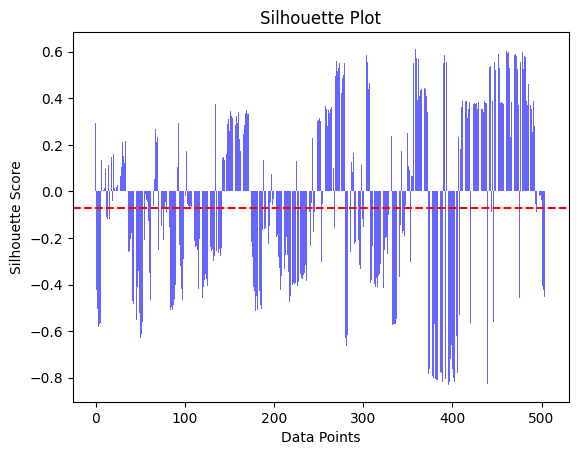

In [11]:
silhouette_vals = silhouette_samples(x, labels)
avg_score = silhouette_score(x, labels)

plt.bar(range(len(silhouette_vals)), silhouette_vals, color='blue', alpha=0.6)
plt.axhline(y=avg_score, color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

In [12]:
silhouette_avg = silhouette_score(x, labels)
print(silhouette_avg)

davies_bouldin_score = davies_bouldin_score(x, labels)
print(davies_bouldin_score)

calinski_harabasz_score = calinski_harabasz_score(x, labels)
print(calinski_harabasz_score)

-0.069992207541974
2.1268180408451425
211.0903507645871


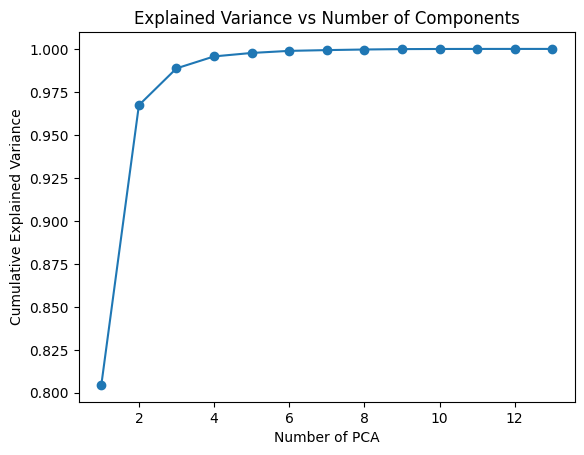

Optimal number of PCA components: 2


In [13]:
pca = PCA().fit(x)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,len(explained_variance)+1), explained_variance, marker = 'o')
plt.xlabel('Number of PCA')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

optimal_components = np.argmax(explained_variance >= 0.95) + 1

print(f"Optimal number of PCA components: {optimal_components}")

In [14]:
model_pca = PCA(n_components = 2)
x_PCA = model_pca.fit_transform(x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


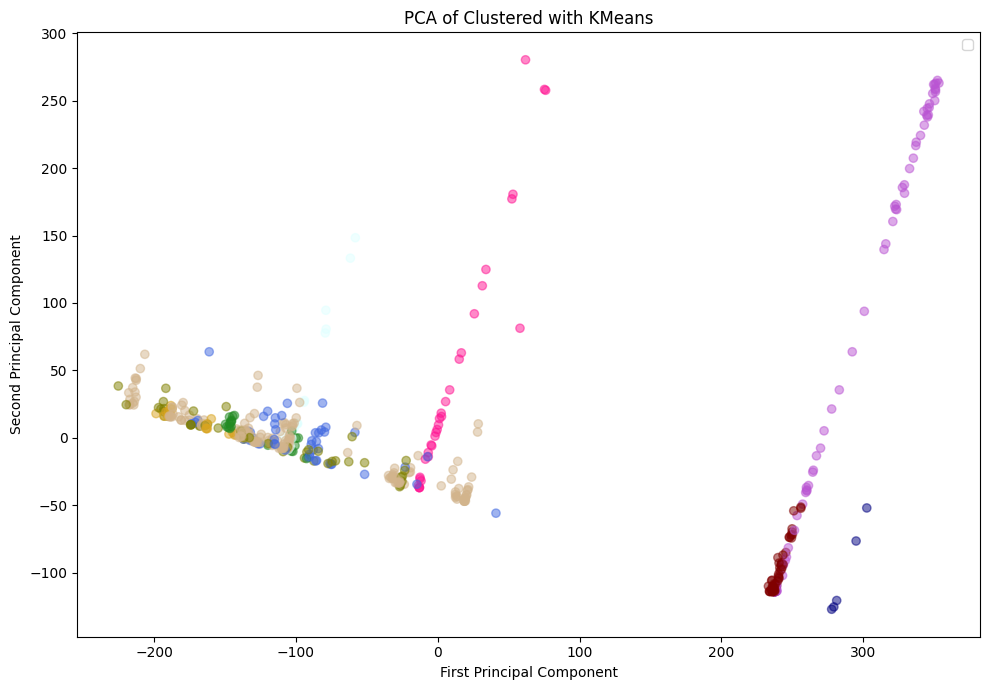

In [15]:
plt.figure(figsize=(10, 7))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
cluster_colors = vectorizer(labels)
cluster_colors[labels == -1] = 'black'

plt.scatter(x_PCA[:, 0], x_PCA[:, 1], c=cluster_colors, alpha=0.5)
plt.title("PCA of Clustered with KMeans")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")


plt.legend()

plt.tight_layout()
plt.show()

In [17]:
perplexities = [20, 30, 40, 50, 60]
silhouette_scores = []

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    x_tsne = tsne.fit_transform(x_PCA) 
    model = GaussianMixture(n_components=10, covariance_type='diag', random_state=42, max_iter=40, tol=0.01)
    labels = model.fit_predict(x_tsne)   

    if len(set(labels)) > 1:
        score = silhouette_score(x_tsne, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

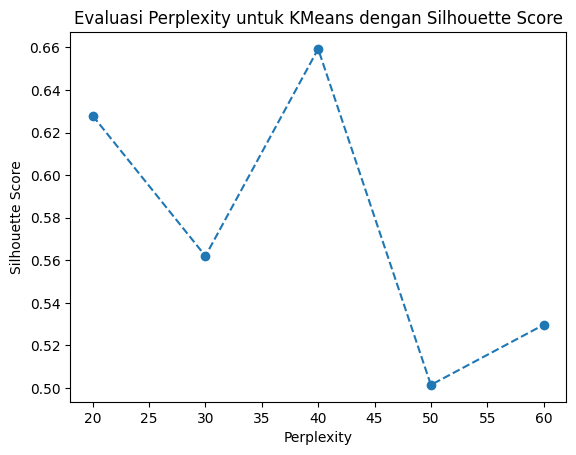

In [18]:
plt.plot(perplexities, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Perplexity')
plt.ylabel('Silhouette Score')
plt.title('Evaluasi Perplexity untuk KMeans dengan Silhouette Score')
plt.show()

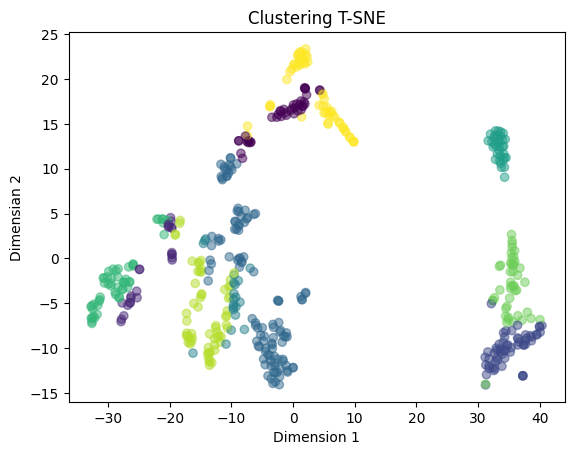

In [19]:
x_tsne = TSNE(n_components=2, perplexity=30).fit_transform(x)
plt.scatter(x_tsne[:,0], x_tsne[:,1], c = labels, cmap = 'viridis', alpha=0.5)
plt.title('Clustering T-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimensian 2')
plt.show()

In [20]:
df['PCA1'] = x_PCA[:,0]
df['PCA2'] = x_PCA[:,1]

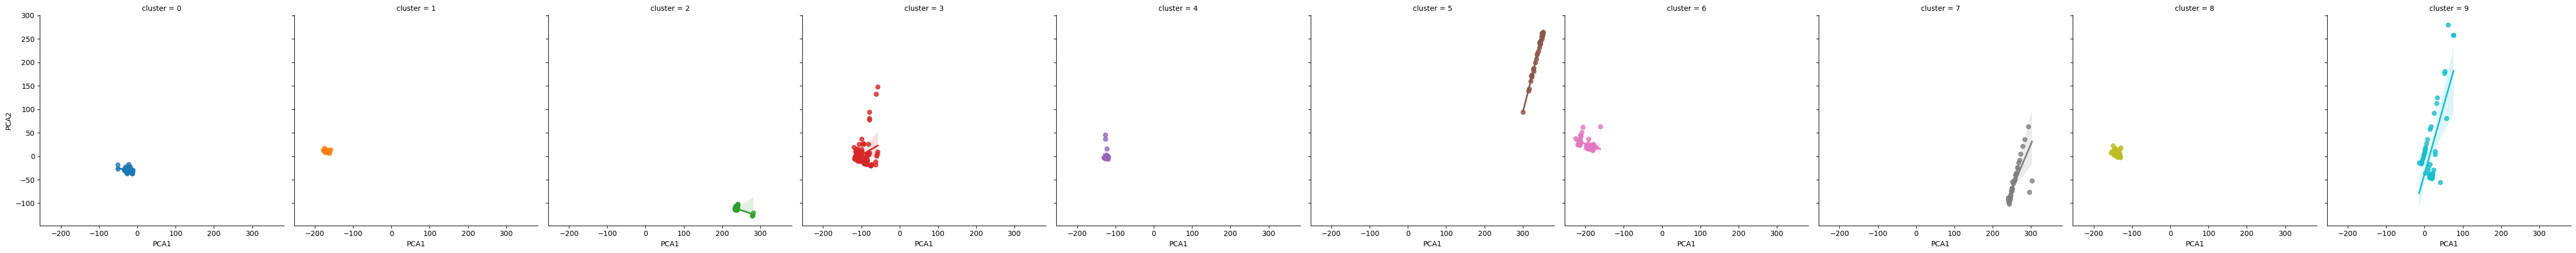

In [23]:
df['cluster'] = labels
sns.lmplot(x = "PCA1",y = "PCA2", data =df, hue = 'cluster', col='cluster',fit_reg = True)